In [59]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
model = YOLO("yolo11n-seg.pt")

100%|██████████| 5.90M/5.90M [00:00<00:00, 20.8MB/s]


In [58]:
img_path = r'C:\\Users\\onurb\\master\\computer_vision\\projet\\CSC_51073_EP-Project\\CSC_51073_EP-Project\\data\\0001.jpg'
image = plt.imread(img_path)
img_size = image.shape

(1920, 1080, 3)


In [11]:
results = model(img_path)


image 1/1 C:\Users\onurb\master\computer_vision\projet\CSC_51073_EP-Project\CSC_51073_EP-Project\data\0001.jpg: 640x384 3 cups, 1 cake, 1 dining table, 104.8ms
Speed: 4.5ms preprocess, 104.8ms inference, 9.3ms postprocess per image at shape (1, 3, 640, 384)


In [22]:
print(type(results[0].masks.data))
#results[0].save(filename="deneme.png")
results[0].show()

<class 'torch.Tensor'>


Evaluation

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1, "..\\Image_Segmentation")
import evaluation

(1920, 1080)


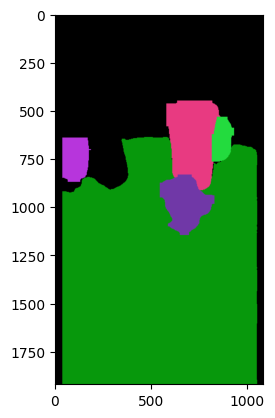

In [66]:
# get prediction masks
prediction_tensor = results[0].masks.data

masks = []
for i in range(prediction_tensor.shape[0]):
    resized_mask = cv2.resize(np.array(prediction_tensor[i].cpu()), (img_size[1], img_size[0]), interpolation=cv2.INTER_LINEAR)
    masks.append(resized_mask)

segmentation_map = evaluation.generate_segmentation_map(masks)

print(masks[0].shape)

plt.imshow(segmentation_map)

Get ground truth mask

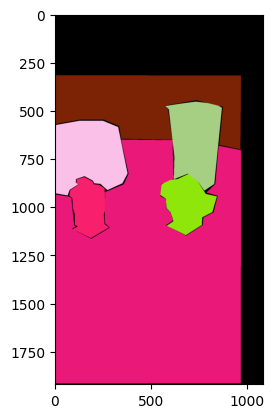

In [67]:
label_png = r"..\\labels\\0001_3\\label.png" #this is generated by lableme

lbl = np.asarray(Image.open(label_png))
nb_labels = np.max(np.unique(lbl))
gt_masks = [np.where(lbl == i, 1, 0) for i in range(1,nb_labels+1)]

segmentation_map = evaluation.generate_segmentation_map(gt_masks)
plt.imshow(segmentation_map)

In [ ]:
#evaluate the model
ious = evaluation.get_ious_from_masks(masks, gt_masks)

for i in range(len(ious)):
    print(f"the max ious of mask {i} is: {ious[i][1]} with iou = {ious[i][0]}")

#evaluate the model
ious = evaluation.get_ious_from_masks(masks, gt_masks)

fig, ax = plt.subplots(4, 2, figsize=(10, 20))  # 1 row, 2 columns

predicted_array = np.array(masks)
ax[0,0].imshow(masks[0])
ax[0,1].imshow(gt_masks[3])

ax[1,0].imshow(masks[1])
ax[1,1].imshow(gt_masks[2])

ax[2,0].imshow(masks[2])
ax[2,1].imshow(gt_masks[4])

ax[3,0].imshow(masks[3])
ax[3,1].imshow(gt_masks[1])

the max ious of mask 0 is: 3 with iou = 0.8043191025786862
the max ious of mask 1 is: 2 with iou = 0.8088858719567932
the max ious of mask 2 is: 1 with iou = 0.8922505753691602
the max ious of mask 3 is: 3 with iou = 0.06224995710325022
the max ious of mask 4 is: 4 with iou = 0.2489294006363402
